### Chrnoic Kidney Disease Prediction - Using Machine Learning

#### Import Python packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Extract the Data-Set

In [3]:
kidney = pd.read_csv('kidneyChronic.csv')

In [4]:
kidney.shape

(400, 25)

#### Performing Exploratory Data Analysis ( EDA )

In [5]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [7]:
kidney.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

In [8]:
kidney['dm']=kidney['dm'].str.strip()

In [9]:
kidney.dm.unique()

array(['yes', 'no', '?'], dtype=object)

In [10]:
kidney.cad=kidney.cad.str.strip()

In [11]:
kidney.cad.unique()

array(['no', 'yes', '?'], dtype=object)

In [12]:
kidney.rbc.unique()

array(['?', 'normal', 'abnormal'], dtype=object)

In [13]:
kidney.pc.unique()

array(['normal', 'abnormal', '?'], dtype=object)

In [14]:
kidney.pcc.unique()

array(['notpresent', 'present', '?'], dtype=object)

In [14]:
kidney.ba.unique()

array(['notpresent', 'present', '?'], dtype=object)

In [15]:
kidney.htn.unique()

array(['yes', 'no', '?'], dtype=object)

In [16]:
kidney.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [17]:
kidney.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Data cleaning

In [18]:
kidney['packed_cell_volume'] = pd.to_numeric(kidney['packed_cell_volume'], errors='coerce')
kidney['white_blood_cell_count'] = pd.to_numeric(kidney['white_blood_cell_count'], errors='coerce')
kidney['red_blood_cell_count'] = pd.to_numeric(kidney['red_blood_cell_count'], errors='coerce')

In [19]:
cat_col=[col for col in kidney.columns if kidney[col].dtype=='object']
for col in cat_col:
    print('{} has {} values '.format(col,kidney[col].unique()))
    print('\n')

age has ['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '?' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79'] values 


blood_pressure has ['80' '50' '70' '90' '?' '100' '60' '110' '140' '180' '120'] values 


specific_gravity has ['1.02' '1.01' '1.005' '1.015' '?' '1.025'] values 


albumin has ['1' '4' '2' '3' '0' '?' '5'] values 


sugar has ['0' '3' '4' '1' '?' '2' '5'] values 


red_blood_cells has ['?' 'normal' 'abnormal'] values 


pus_cell has ['normal' 'abnormal' '?'] values 


pus_cell_clumps has ['notpresent' 'present' '?'] values 


bacteria has ['notpresent' 'present' '?'] values 


blood_glucose_random has ['121' '?' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76

In [20]:
cat_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [57]:
num_col = [col for col in kidney.columns if kidney[col].dtype != 'object']

In [58]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [23]:
for col in cat_col:
    print(f"{col} has {kidney[col].unique()} values\n")

age has ['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '?' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79'] values

blood_pressure has ['80' '50' '70' '90' '?' '100' '60' '110' '140' '180' '120'] values

specific_gravity has ['1.02' '1.01' '1.005' '1.015' '?' '1.025'] values

albumin has ['1' '4' '2' '3' '0' '?' '5'] values

sugar has ['0' '3' '4' '1' '?' '2' '5'] values

red_blood_cells has ['?' 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' '?'] values

pus_cell_clumps has ['notpresent' 'present' '?'] values

bacteria has ['notpresent' 'present' '?'] values

blood_glucose_random has ['121' '?' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263'

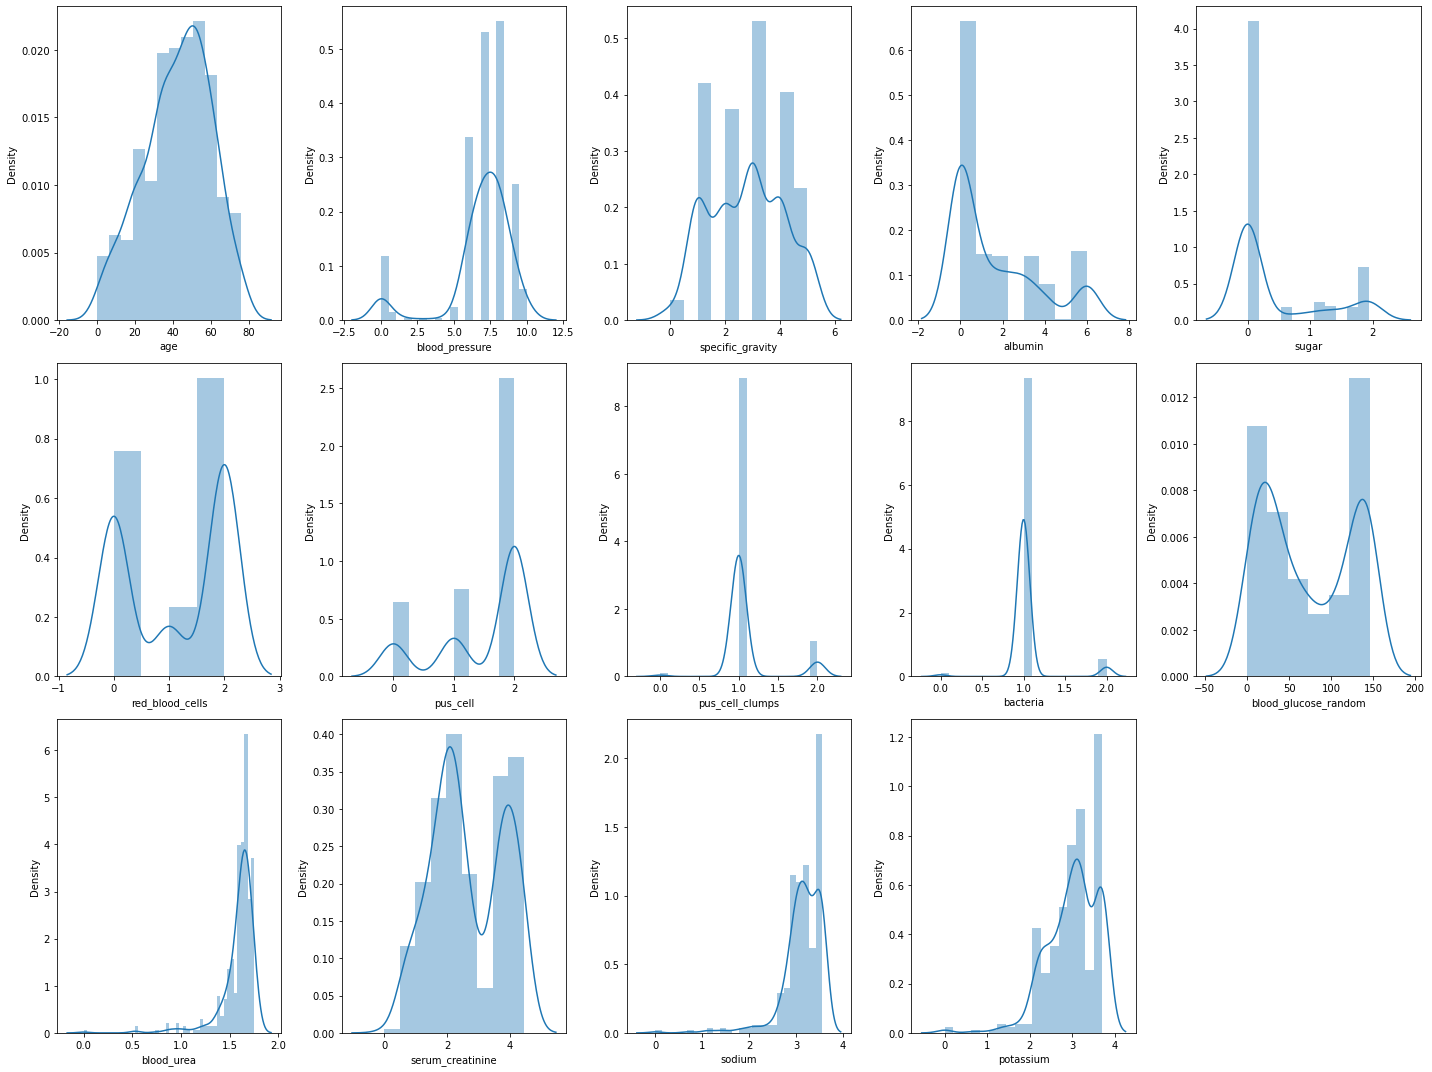

In [92]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show();

In [93]:
kidney.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

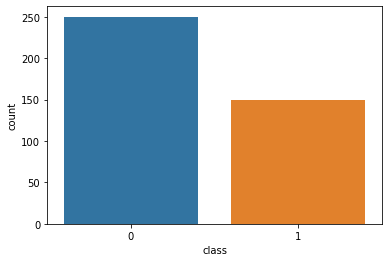

In [140]:
sns.countplot(kidney['class']);

In [141]:
kidney.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
age,1.000000,-0.051021,-0.070332,0.261673,0.236846,-0.238553,-0.243103,0.145354,0.081219,-0.061376,...,-0.260366,0.117852,-0.179097,0.362110,0.327482,0.198635,0.154240,0.117707,0.051876,-0.320692
blood_pressure,-0.051021,1.000000,0.069610,-0.075075,-0.016628,-0.028967,-0.017242,-0.043390,-0.058111,0.082824,...,0.092362,-0.060651,0.072641,-0.172161,-0.048670,-0.086145,-0.040200,0.035350,-0.015417,0.086301
specific_gravity,-0.070332,0.069610,1.000000,0.207846,0.374139,0.057696,-0.227669,-0.294392,-0.214823,-0.086750,...,0.309844,-0.160627,0.249055,-0.146683,-0.172966,-0.069963,-0.145709,-0.156144,-0.066190,0.435415
albumin,0.261673,-0.075075,0.207846,1.000000,0.751335,-0.362575,-0.674784,0.168220,0.178082,0.062862,...,-0.432626,0.060967,-0.284465,0.491473,0.420256,0.242675,0.262547,0.327488,0.316591,-0.529043
sugar,0.236846,-0.016628,0.374139,0.751335,1.000000,-0.431994,-0.653546,-0.018152,-0.001621,0.070502,...,-0.224676,0.020053,-0.167431,0.363349,0.456501,0.214465,0.106913,0.145501,0.176423,-0.344677
red_blood_cells,-0.238553,-0.028967,0.057696,-0.362575,-0.431994,1.000000,0.393821,0.002845,0.019199,-0.097686,...,0.304265,0.021397,0.232264,-0.321229,-0.358417,-0.129224,-0.190258,-0.143371,-0.135308,0.629978
pus_cell,-0.243103,-0.017242,-0.227669,-0.674784,-0.653546,0.393821,1.000000,-0.136040,-0.088435,-0.096294,...,0.318980,-0.040803,0.227326,-0.344689,-0.364847,-0.154193,-0.172015,-0.244199,-0.233601,0.403575
pus_cell_clumps,0.145354,-0.043390,-0.294392,0.168220,-0.018152,0.002845,-0.136040,1.000000,0.376102,-0.009289,...,-0.269950,0.136080,-0.240472,0.206843,0.177564,0.184861,0.193949,0.113742,0.178299,-0.289498
bacteria,0.081219,-0.058111,-0.214823,0.178082,-0.001621,0.019199,-0.088435,0.376102,1.000000,0.038238,...,-0.180448,0.071516,-0.175124,0.111083,0.101515,0.157115,0.155157,0.141271,0.064608,-0.221212
blood_glucose_random,-0.061376,0.082824,-0.086750,0.062862,0.070502,-0.097686,-0.096294,-0.009289,0.038238,1.000000,...,-0.004996,0.037235,-0.019683,0.062486,0.076926,0.076537,0.028753,0.083738,0.087543,-0.130590


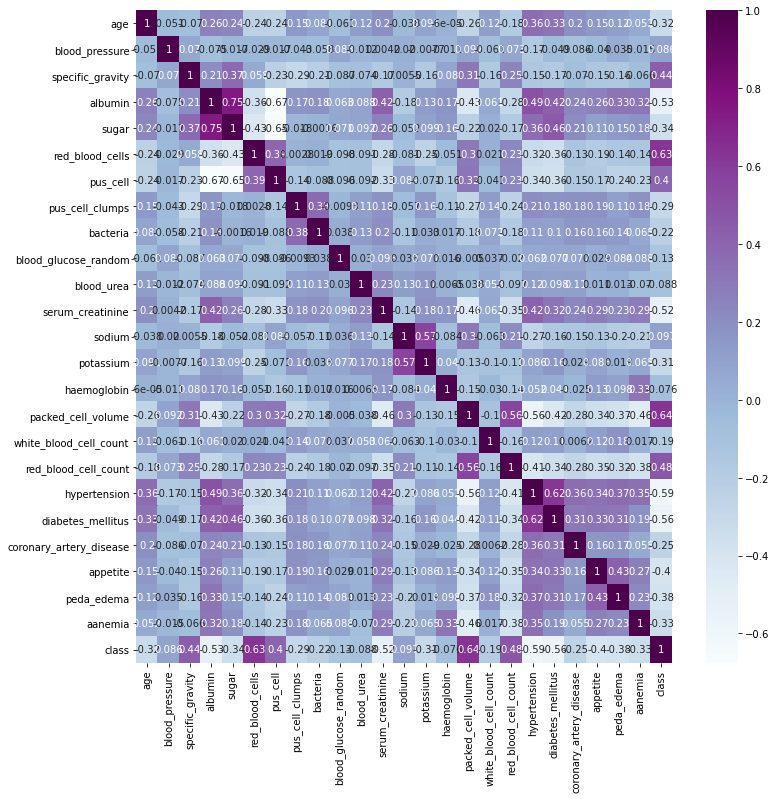

In [143]:
plt.figure(figsize=(12,12))
sns.heatmap(kidney.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True);

In [147]:
kidney.groupby(['red_blood_cells','class'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells class                                   
0               0        143  4.397203     4.3  2.3  8.0
                1          9  5.533333     5.9  4.5  6.5
1               0         47  4.242553     4.1  2.1  6.4
2               0         60  4.145000     4.1  2.1  8.0
                1        141  5.320567     5.3  3.4  6.5

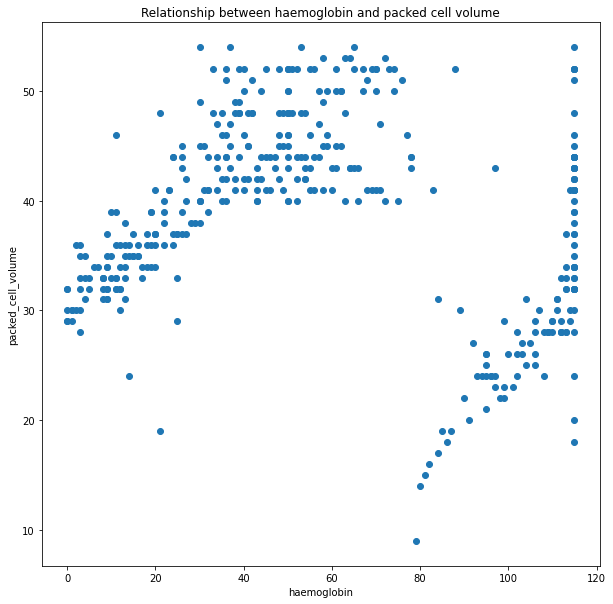

In [150]:
plt.figure(figsize=(10,10))
plt.scatter(x=kidney.haemoglobin,y=kidney['packed_cell_volume'])
plt.xlabel('haemoglobin')
plt.ylabel('packed_cell_volume')
plt.title('Relationship between haemoglobin and packed cell volume');

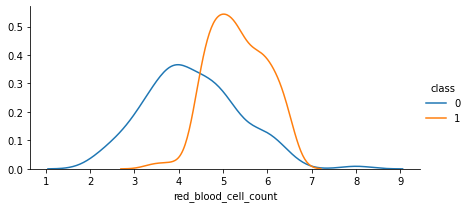

In [154]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'red_blood_cell_count')
grid.add_legend();

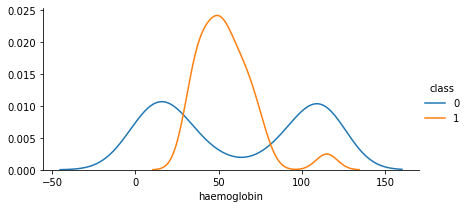

In [156]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'haemoglobin')
grid.add_legend();

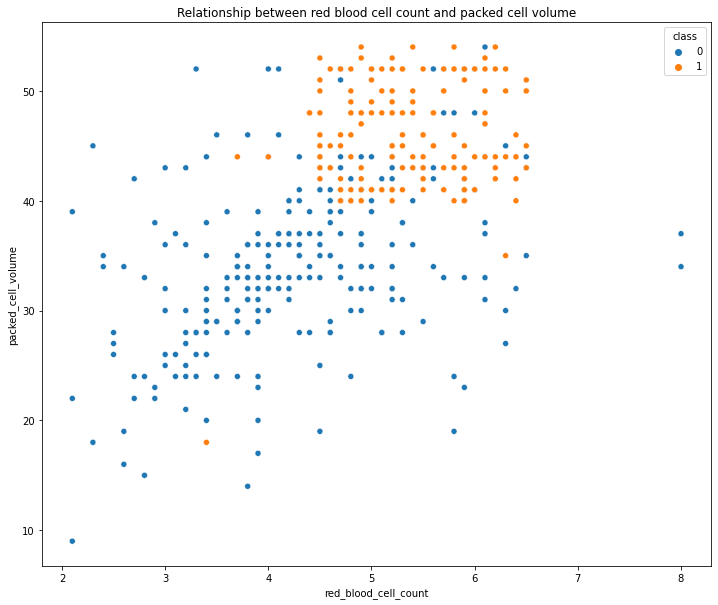

In [159]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red_blood_cell_count'],y=kidney['packed_cell_volume'],hue=kidney['class'])
plt.xlabel('red_blood_cell_count')
plt.ylabel('packed_cell_volume')
plt.title('Relationship between red blood cell count and packed cell volume');

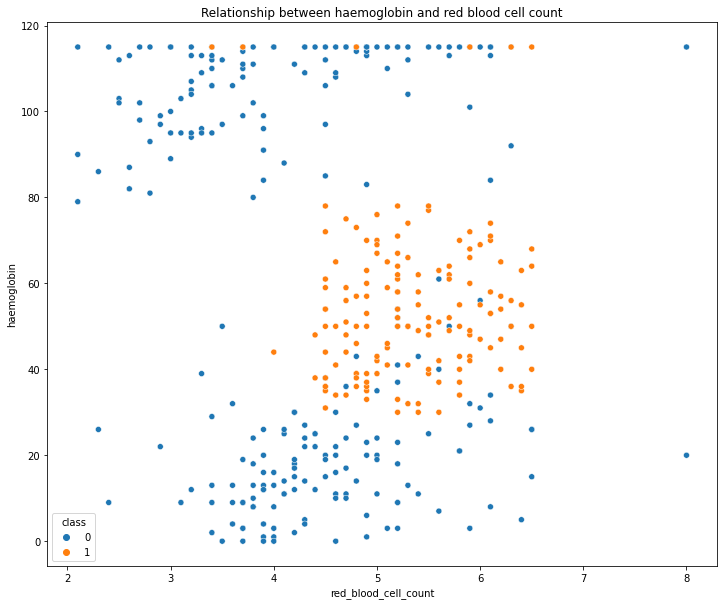

In [161]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red_blood_cell_count'],y=kidney['haemoglobin'],hue=kidney['class'])
plt.xlabel('red_blood_cell_count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count');

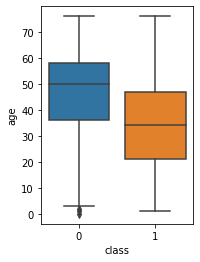

In [163]:
plt.subplot(1,2,1)
sns.boxplot(x=kidney['class'],y=kidney['age']);

<AxesSubplot:xlabel='red_blood_cells', ylabel='count'>

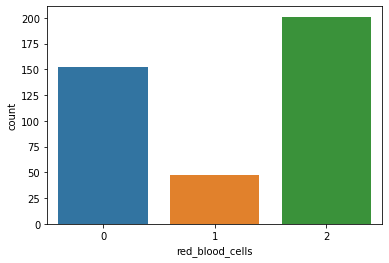

In [165]:
sns.countplot(kidney['red_blood_cells'])

In [ ]:
#####to handel the skewness in the data 
def handel_outlier(col):
    kidney[col] =np.log1p(kidney[col])

In [95]:
handel_outlier('blood_urea')
handel_outlier('sodium')
handel_outlier('potassium')
handel_outlier('serum_creatinine')
handel_outlier('sugar')

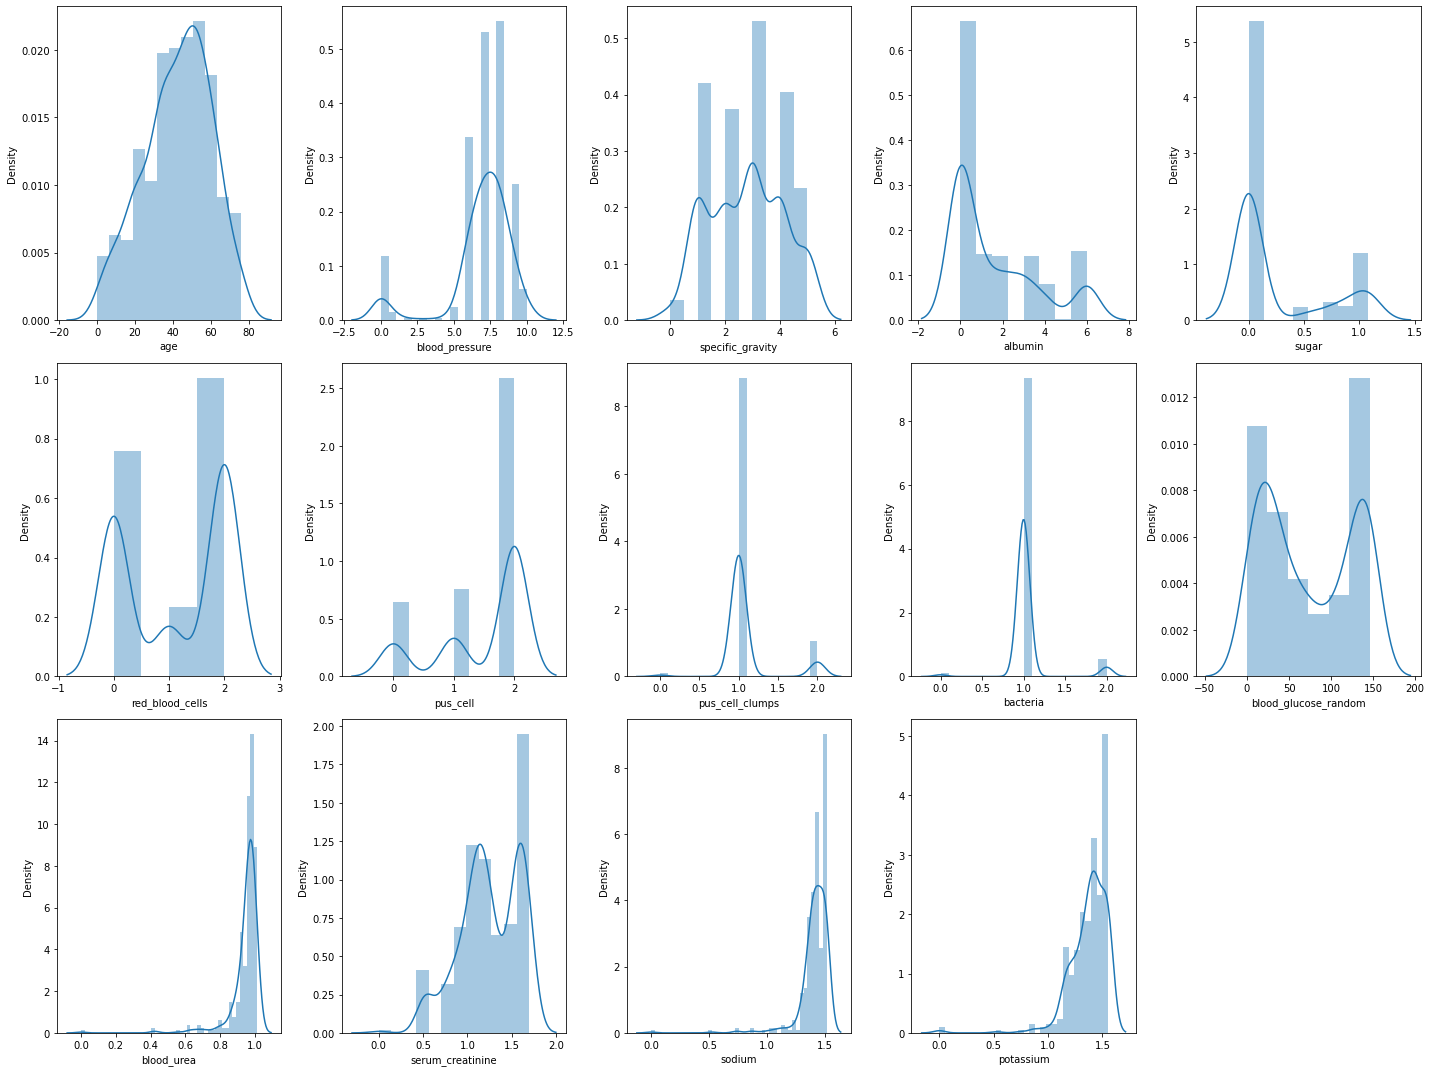

In [96]:
###plotting displot to see how the distribution of the data is 

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [97]:
def random_value_imputation(feature):
    random_sample = kidney[feature].dropna().sample(kidney[feature].isna().sum())
    random_sample.index = kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(),feature] =random_sample
    
def impute_mode(feature):
    mode = kidney[feature].mode()[0]
    kidney[feature] =kidney[feature].fillna(mode)

In [99]:
for col in num_col:
    random_value_imputation(col)

In [101]:
kidney[num_col].isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [102]:
kidney.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [103]:
for col in cat_col:
    impute_mode(col)

In [104]:
kidney[cat_col].isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [105]:
###label encoding for categorical data 
from sklearn.preprocessing  import LabelEncoder

encode = LabelEncoder()

for col in cat_col:
    kidney[col]=encode.fit_transform(kidney[col])

In [106]:
kidney.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,36,8,3,1,0,0,2,1,1,21,...,44.0,7800.0,5.2,2,2,1,1,1,1,0
1,60,5,3,4,0,0,2,1,1,146,...,38.0,6000.0,5.3,1,1,1,1,1,1,0
2,52,8,1,2,3,2,2,1,1,114,...,31.0,7500.0,4.2,1,2,1,2,1,2,0
3,36,7,0,4,0,2,1,2,1,17,...,32.0,6700.0,3.9,2,1,1,2,2,2,0
4,40,8,1,2,0,2,2,1,1,6,...,35.0,7300.0,4.6,1,1,1,1,1,1,0


In [107]:
X = kidney.drop(columns ='class' , axis=1)
Y = kidney['class']

In [71]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,36,8,3,1,0,0,2,1,1,21,...,54,44.0,7800.0,5.2,2,2,1,1,1,1
1,60,5,3,4,0,0,2,1,1,146,...,13,38.0,6000.0,5.3,1,1,1,1,1,1
2,52,8,1,2,3,2,2,1,1,114,...,111,31.0,7500.0,4.2,1,2,1,2,1,2
3,36,7,0,4,0,2,1,2,1,17,...,12,32.0,6700.0,3.9,2,1,1,2,2,2
4,40,8,1,2,0,2,2,1,1,6,...,16,35.0,7300.0,4.6,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,44,8,3,0,0,2,2,1,1,37,...,57,47.0,6700.0,4.9,1,1,1,1,1,1
396,30,7,4,0,0,2,2,1,1,122,...,65,54.0,7800.0,6.2,1,1,1,1,1,1
397,1,8,3,0,0,2,2,1,1,0,...,58,49.0,6600.0,5.4,1,1,1,1,1,1
398,4,6,4,0,0,2,2,1,1,14,...,42,51.0,7200.0,5.9,1,1,1,1,1,1


In [72]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

#### Model selection

In [108]:

from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

feture_el_model  = SelectFromModel(Lasso(alpha=0.005 ,random_state =42))

In [109]:
feture_el_model.fit(X,Y)
feture_el_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False])

In [110]:
cols= X.columns
selected_feature = cols[feture_el_model.get_support()]

In [111]:
print('total_features {}' .format(X.shape[1]))
print('total_features {}' .format(len(selected_feature)))

total_features 24
total_features 19


In [112]:
X= X[selected_feature]

In [113]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=.3,random_state=42)

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score

models = []
models.append(('LogisticRegression',LogisticRegression(solver='liblinear')))
models.append(('Naive bayes' ,GaussianNB()))
models.append(('RandomForest' ,RandomForestClassifier()))
models.append(('Decision Tree ' ,DecisionTreeClassifier()))
models.append (('KNN' ,KNeighborsClassifier()))

In [115]:
for name , model in models :
    print(name)
    model.fit(x_train , y_train)
    
    prediction = model.predict(x_test)
    
    from sklearn.metrics import confusion_matrix
    
    print(confusion_matrix(prediction,y_test))
    print('\n')
    print(accuracy_score(prediction,y_test))
    print('\n')

LogisticRegression
[[73  1]
 [ 3 43]]


0.9666666666666667


Naive bayes
[[74  5]
 [ 2 39]]


0.9416666666666667


RandomForest
[[76  0]
 [ 0 44]]


1.0


Decision Tree 
[[73  0]
 [ 3 44]]


0.975


KNN
[[48 27]
 [28 17]]


0.5416666666666666




In [116]:
model = RandomForestClassifier()
print('RandomForest')
model.fit(x_train , y_train)
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
    
print(confusion_matrix(prediction,y_test))
print('\n')
print(accuracy_score(prediction,y_test))
print('\n')

RandomForest
[[76  2]
 [ 0 42]]


0.9833333333333333




### Evaluation of the model

In [122]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [126]:
confusion_matrix(y_test, model.predict(x_test))

array([[76,  0],
       [ 2, 42]], dtype=int64)

In [128]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(x_test))*100, 2)}%")

Accuracy is 98.33%
